In [140]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [141]:
data=pd.read_csv('dataset.csv')

In [172]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


## Fields
### 1.species
##### Description: Represents the species of penguins in the dataset.
##### Possible Values: Adelie, Chinstrap, Gentoo.
### 2.bill_length_mm
##### Description: Length of the penguin's bill (beak) in millimeters.
### 3.bill_depth_mm
##### Description: Depth (thickness) of the penguin's bill (beak) in millimeters.
### 4.island
##### Description: The island where the penguin was observed or captured.
##### Possible Values: Examples include Torgersen, Dream, Biscoe.
### 5.sex
##### Description: The sex of the penguin (male or female).
##### Possible Values: Male, Female.
### 6.flipper_length_mm
##### Description: Length of the penguin's flipper (wing) in millimeters.
### 7.body_mass_g
##### Description: Body mass of the penguin in grams.


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [143]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,337.000000,342.000000,342.000000,342.000000
mean,43.876855,17.151170,200.915205,4273.976608
std,5.478600,1.974793,14.061714,1119.229602
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.600000,190.000000,3550.000000
50%,44.100000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,15000.000000


### Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it

### Handling Missing Values:

##### Identified the total number of missing values in each column using data.isnull().sum().
##### Calculated the mean for the bill_length_mm column and filled missing values with the calculated mean (fillna(mean_value)).
### Checking for Duplicates:
##### Identified duplicate rows in the dataset using data_cleaned.duplicated().
##### Counted the number of duplicates using duplicates.sum() and reported num_duplicates.
### Skewness Check:
##### Calculated the skewness of the bill_length_mm column using data_cleaned['bill_length_mm'].skew().
##### Observed that the skewness is low (0.07966), indicating the data is nearly symmetrical. No transformation was required.

In [144]:
data.isnull().sum()

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [145]:
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [146]:
data['sex'].value_counts()

sex
male       164
female     162
unknown      2
Name: count, dtype: int64

In [147]:
data['sex'] = data['sex'].replace('unknown', None)
data_cleaned = data.dropna(subset=['sex'])

In [148]:
data_cleaned['sex'].value_counts()

sex
male      164
female    162
Name: count, dtype: int64

In [149]:
data_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       5
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [150]:
skewness = data_cleaned['bill_length_mm'].skew()
skewness

0.07966071631086345

In [151]:
mean_value = data_cleaned['bill_length_mm'].mean()
data_cleaned['bill_length_mm'] = data_cleaned['bill_length_mm'].fillna(mean_value)

In [152]:
data_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [153]:
duplicates = data_cleaned.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

In [154]:
data_cleaned.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###  What is the average body_mass_g for Gentoo penguins?

In [155]:
gentoo_data = data_cleaned[data_cleaned['species'] == 'Gentoo']
average_body_mass = gentoo_data['body_mass_g'].mean()
average_body_mass

5155.172413793103

### How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species

Skewness of bill_length_mm by species:
 species
Adelie       0.145872
Chinstrap   -0.049118
Gentoo       0.673871
Name: bill_length_mm, dtype: float64
Kurtosis of bill_length_mm by species:
 species
Adelie      -0.166544
Chinstrap   -0.143532
Gentoo       1.085463
Name: bill_length_mm, dtype: float64

Skewness of bill_depth_mm by species:
 species
Adelie       0.278459
Chinstrap    0.022808
Gentoo       0.302928
Name: bill_depth_mm, dtype: float64
Kurtosis of bill_depth_mm by species:
 species
Adelie      -0.084444
Chinstrap   -0.897875
Gentoo      -0.632847
Name: bill_depth_mm, dtype: float64


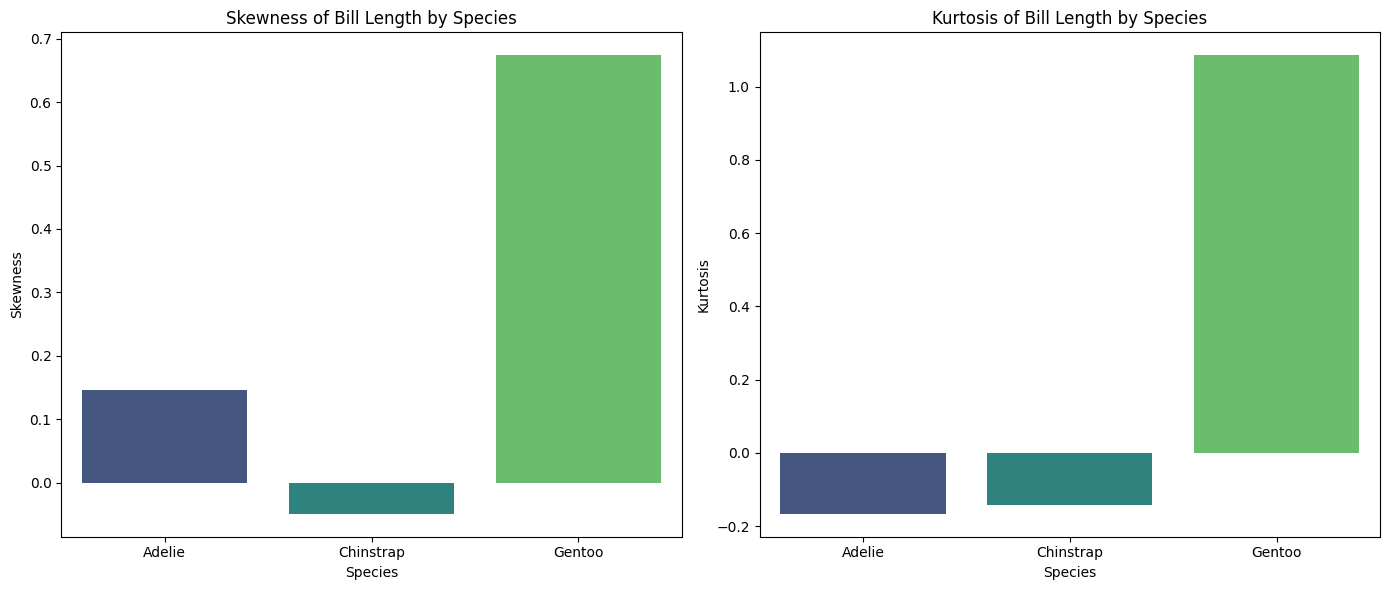

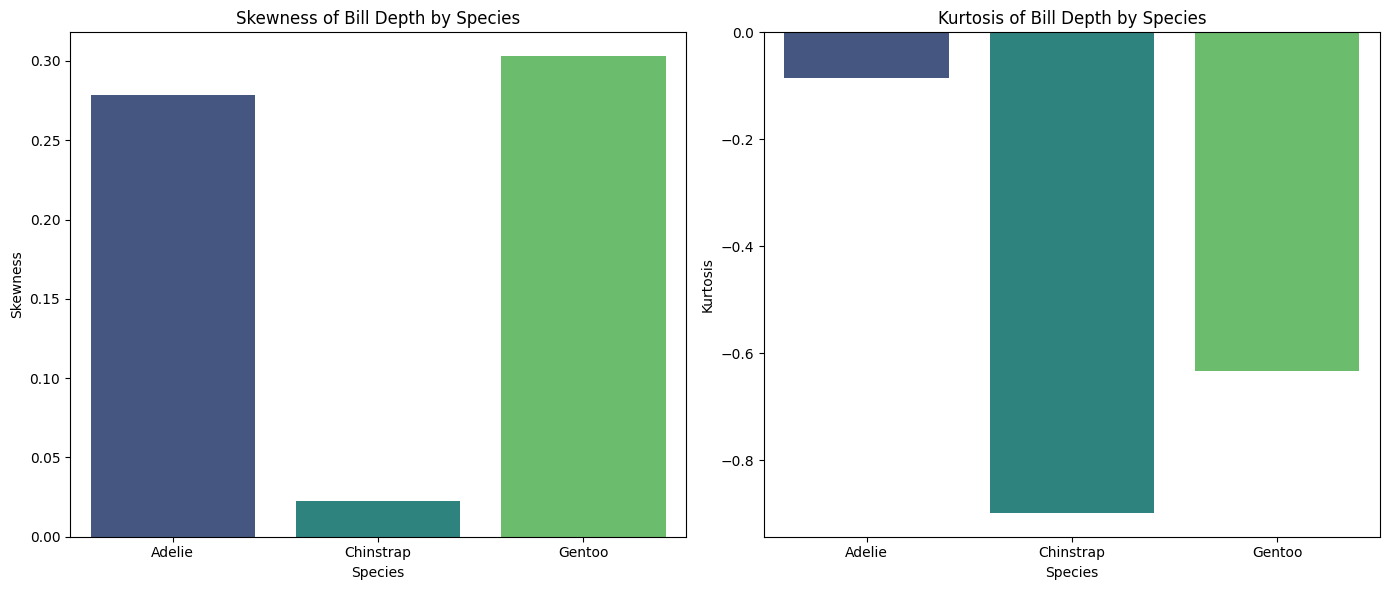

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
skewness_bill_length = data_cleaned.groupby('species')['bill_length_mm'].apply(lambda x: skew(x.dropna()))
kurtosis_bill_length = data_cleaned.groupby('species')['bill_length_mm'].apply(lambda x: kurtosis(x.dropna()))
skewness_bill_depth = data_cleaned.groupby('species')['bill_depth_mm'].apply(lambda x: skew(x.dropna()))
kurtosis_bill_depth = data_cleaned.groupby('species')['bill_depth_mm'].apply(lambda x: kurtosis(x.dropna()))
print("Skewness of bill_length_mm by species:\n", skewness_bill_length)
print("Kurtosis of bill_length_mm by species:\n", kurtosis_bill_length)
print("\nSkewness of bill_depth_mm by species:\n", skewness_bill_depth)
print("Kurtosis of bill_depth_mm by species:\n", kurtosis_bill_depth)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Skewness plot
sns.barplot(x=skewness_bill_length.index, y=skewness_bill_length.values, ax=axes[0], palette='viridis')
axes[0].set_title('Skewness of Bill Length by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Skewness')

# Kurtosis plot
sns.barplot(x=kurtosis_bill_length.index, y=kurtosis_bill_length.values, ax=axes[1], palette='viridis')
axes[1].set_title('Kurtosis of Bill Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Kurtosis')

plt.tight_layout()
plt.show()

# Plotting skewness and kurtosis for bill_depth_mm
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Skewness plot
sns.barplot(x=skewness_bill_depth.index, y=skewness_bill_depth.values, ax=axes[0], palette='viridis')
axes[0].set_title('Skewness of Bill Depth by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Skewness')

# Kurtosis plot
sns.barplot(x=kurtosis_bill_depth.index, y=kurtosis_bill_depth.values, ax=axes[1], palette='viridis')
axes[1].set_title('Kurtosis of Bill Depth by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Kurtosis')

plt.tight_layout()
plt.show()


### Skewness
##### 1. Skewness
##### Definition: Skewness measures the asymmetry of the data distribution. A skewness value near 0 indicates a symmetrical distribution, while positive/negative skewness indicates right/left-tailed distributions.

##### Bill Length (by species):
##### Adelie: Skewness = 0.145872 (slightly positive, nearly symmetrical).
##### Chinstrap: Skewness = -0.049118 (slightly negative, nearly symmetrical).
##### Gentoo: Skewness = 0.673871 (moderate positive skew, longer right tail).
##### Bill Depth (by species):
##### Adelie: Skewness = 0.278459 (slightly positive).
##### Chinstrap: Skewness = 0.022808 (nearly symmetrical).
##### Gentoo: Skewness = 0.302928 (slightly positive).

## Kurtosis
##### Definition: Kurtosis measures the "tailedness" of a distribution. A value of 0 indicates a normal (mesokurtic) distribution. Positive values indicate heavy tails (leptokurtic), and negative values indicate light tails

##### --- Bill Length (by species):

##### Adelie: Kurtosis = -0.166544 (light-tailed).
##### Chinstrap: Kurtosis = -0.143532 (light-tailed).
##### Gentoo: Kurtosis = 1.085463 (moderately heavy-tailed).
##### Bill Depth (by species):
##### Adelie: Kurtosis = -0.084444 (nearly normal, slightly light-tailed).
##### Chinstrap: Kurtosis = -0.897875 (significantly light-tailed).
##### Gentoo: Kurtosis = -0.632847 (light-tailed).

###  Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers 
#### Outliers can be detected using methods like:

##### IQR (Interquartile Range): Outliers are defined as values outside the range of Q1 - 1.5IQR or Q3 + 1.5IQR.

In [157]:
def detect_outliers_iqr(data_cleaned, column):
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outliers_dict = {}
for col in numeric_columns:
    outliers, lower, upper = detect_outliers_iqr(data_cleaned, col)
    outliers_dict[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers (Lower Bound: {lower}, Upper Bound: {upper})")


bill_length_mm: 0 outliers (Lower Bound: 25.662499999999984, Upper Bound: 62.16250000000001)
bill_depth_mm: 0 outliers (Lower Bound: 10.987499999999997, Upper Bound: 23.2875)
flipper_length_mm: 0 outliers (Lower Bound: 155.5, Upper Bound: 247.5)
body_mass_g: 3 outliers (Lower Bound: 1675.0, Upper Bound: 6675.0)


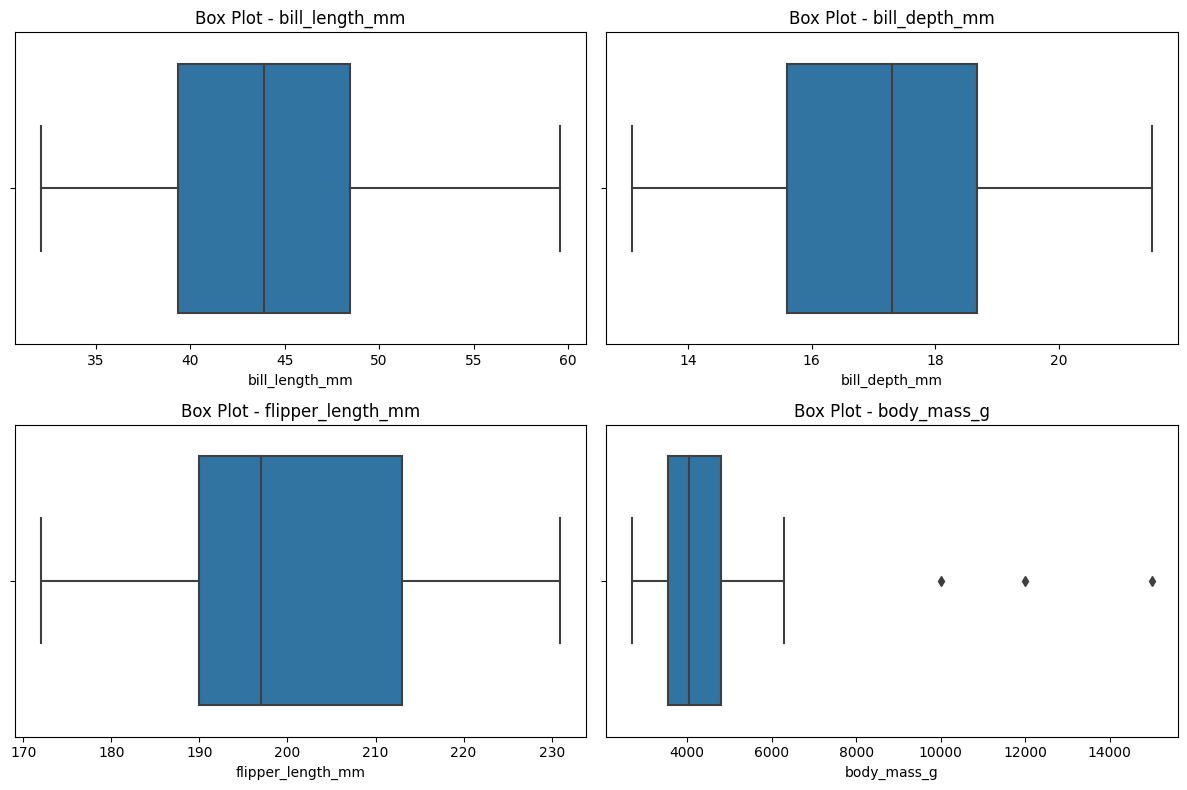

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f"Box Plot - {col}")
plt.tight_layout()
plt.show()


### Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

#### Principal Component Analysis (PCA) is a dimensionality reduction technique primarily used in scenarios where the dataset contains a large number of features, and there is a need to reduce dimensionality while retaining most of the variance in the data. Here’s why PCA was not considered necessary for this analysis:

In [159]:

num_features = data_cleaned.shape[1] 
num_observations = data_cleaned.shape[0]  
print(f"Number of features: {num_features}")
print(f"Number of observations: {num_observations}")
ratio = num_features / num_observations
print(f"Feature to Observation ratio: {ratio}")


Number of features: 7
Number of observations: 326
Feature to Observation ratio: 0.02147239263803681


### Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

In [160]:
max_flipper_length = data_cleaned.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
longest_flippers = data_cleaned.loc[data_cleaned.groupby(['island'])['flipper_length_mm'].idxmax()]
longest_flippers[['island', 'species', 'flipper_length_mm']]


,island,species,flipper_length_mm
215,Biscoe,Gentoo,231.0
323,Dream,Chinstrap,212.0
123,Torgersen,Adelie,202.0


### Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.


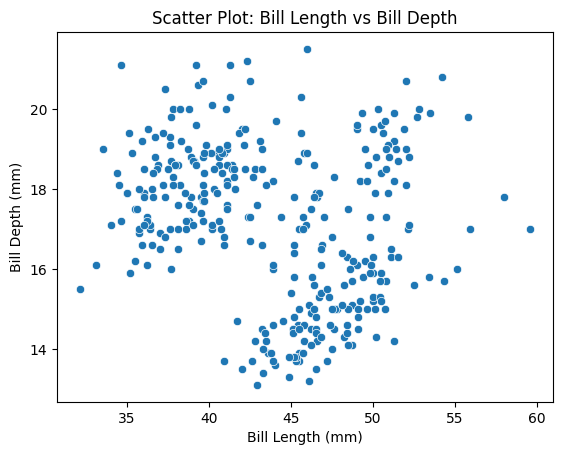

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data_cleaned, x='bill_length_mm', y='bill_depth_mm')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

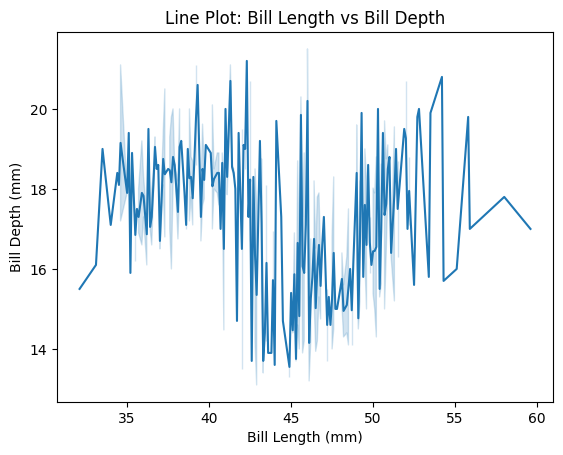

In [162]:
sns.lineplot(data=data_cleaned, x='bill_length_mm', y='bill_depth_mm')
plt.title('Line Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

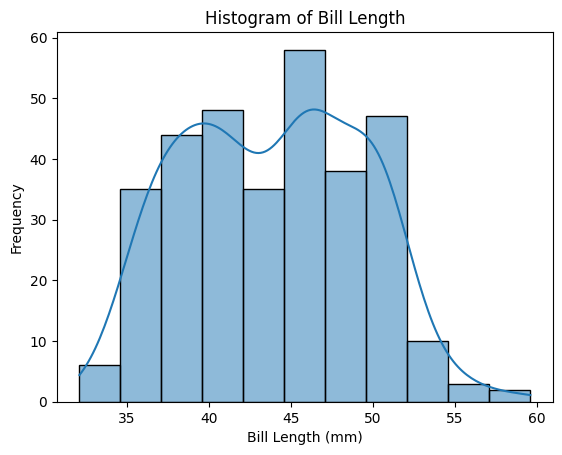

In [163]:
sns.histplot(data=data_cleaned, x='bill_length_mm', kde=True)
plt.title('Histogram of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

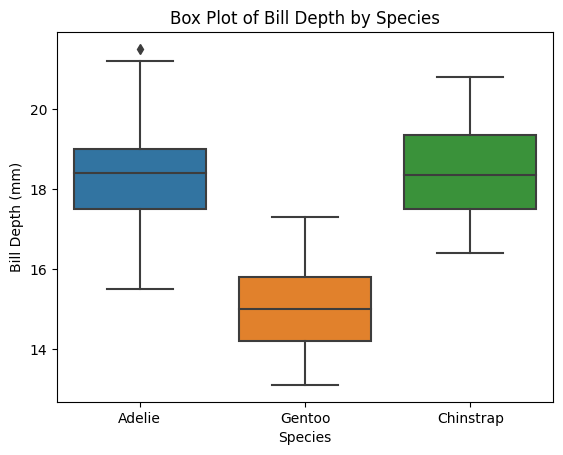

In [164]:
sns.boxplot(data=data_cleaned, x='species', y='bill_depth_mm')
plt.title('Box Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

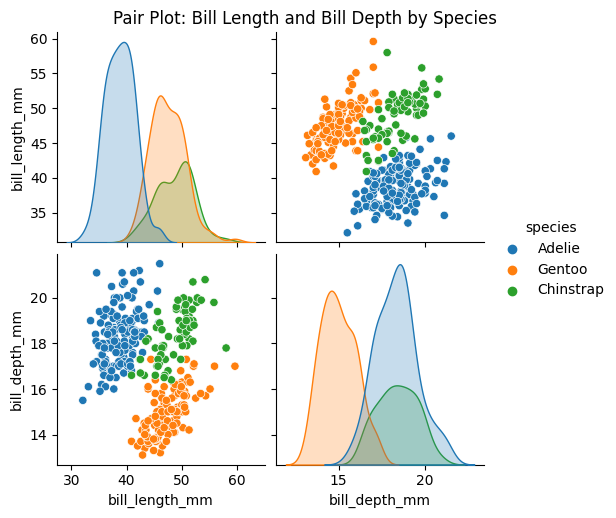

In [165]:
sns.pairplot(data=data_cleaned[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species')
plt.suptitle('Pair Plot: Bill Length and Bill Depth by Species', y=1.02)
plt.show()

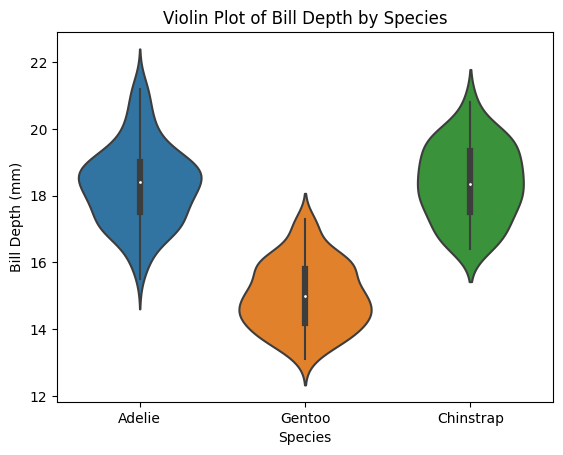

In [166]:
sns.violinplot(data=data_cleaned, x='species', y='bill_depth_mm')
plt.title('Violin Plot of Bill Depth by Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

### Perform z-score normalization on this dataset

In [167]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
data_normalized = data_cleaned.copy()
data_normalized[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])
data_normalized.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.879651,0.790970,-1.413884,-0.467122,male
1,Adelie,Torgersen,-0.806252,0.125336,-1.058451,-0.423034,female
2,Adelie,Torgersen,-0.659452,0.432552,-0.418670,-0.908008,female
4,Adelie,Torgersen,-1.320048,1.098185,-0.560844,-0.731654,female
5,Adelie,Torgersen,-0.842951,1.763819,-0.774104,-0.555300,male
